# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

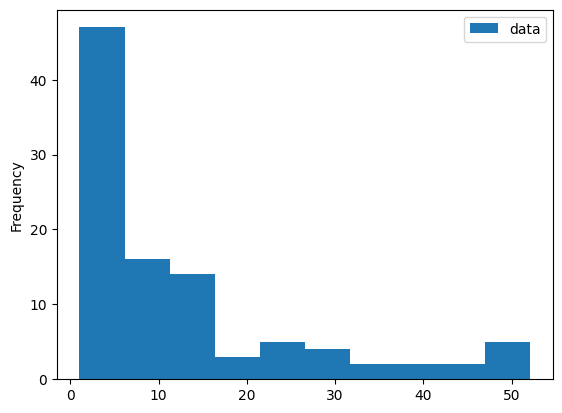

In [ ]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

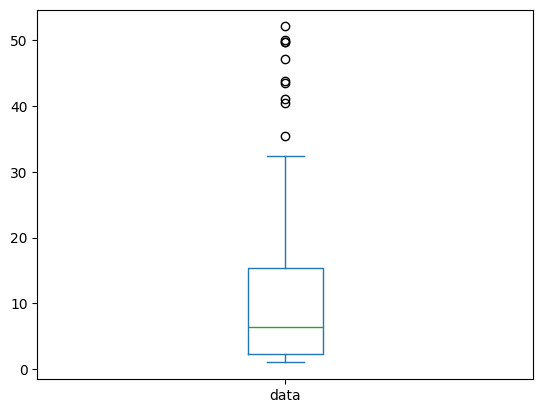

In [ ]:
df.plot.box()

1) A short explanation of the pros and cons of these two representations.

Histogram:

Hard to tell exact values for the highest-priced drugs.
Doesn’t clearly show outliers (very expensive drugs).

Boxplot:

Doesn’t show the overall shape of price distribution. Harder to understand without labels.

2) I would choose boxplot since the goal is to understand how much the more expensive drugs cost because it highlights high prices and outliers more clearly.

3) To Improve the Visualization

For the Histogram: I would add bins for better grouping and use color shading.
For the Boxplot: I wolud add labels for the min, max, and median to make it clearer.
For Both: I would use a title and axis labels to explain what the data represents.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [ ]:
phishing_data = pd.read_csv("/workspaces/2025-spring-B2/dataset_phishing.csv")
phishing_data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
phishing_data.isnull().sum

<bound method DataFrame.sum of          url  length_url  length_hostname     ip  nb_dots  nb_hyphens  nb_at  \
0      False       False            False  False    False       False  False   
1      False       False            False  False    False       False  False   
2      False       False            False  False    False       False  False   
3      False       False            False  False    False       False  False   
4      False       False            False  False    False       False  False   
...      ...         ...              ...    ...      ...         ...    ...   
11425  False       False            False  False    False       False  False   
11426  False       False            False  False    False       False  False   
11427  False       False            False  False    False       False  False   
11428  False       False            False  False    False       False  False   
11429  False       False            False  False    False       False  False   

       n

In [ ]:
phishing_data.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
11425    False
11426    False
11427    False
11428    False
11429    False
Length: 11430, dtype: bool>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

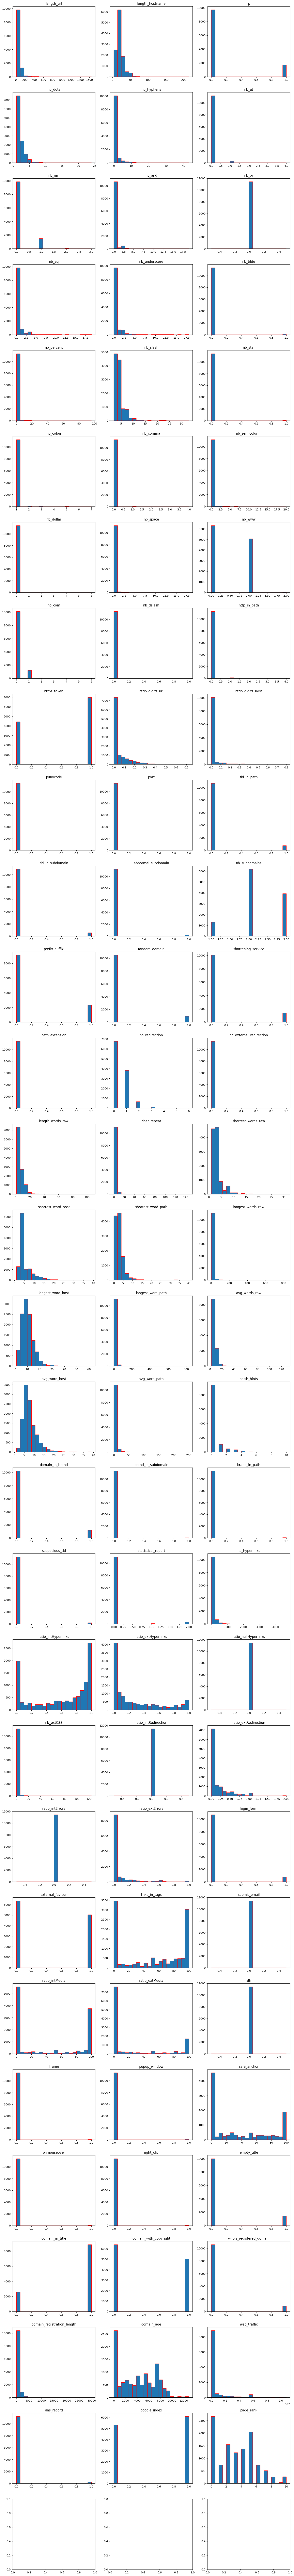

In [ ]:
# Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).
# Drop non-numeric columns for visualization
numeric_data = phishing_data.select_dtypes(include=['int64', 'float64'])

num_cols = numeric_data.shape[1]
fig, axes = plt.subplots(nrows=num_cols // 3 + 1, ncols=3, figsize=(15, num_cols * 1.5))

axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(numeric_data.columns):
    axes[i].hist(numeric_data[col], bins=20, edgecolor='black')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()



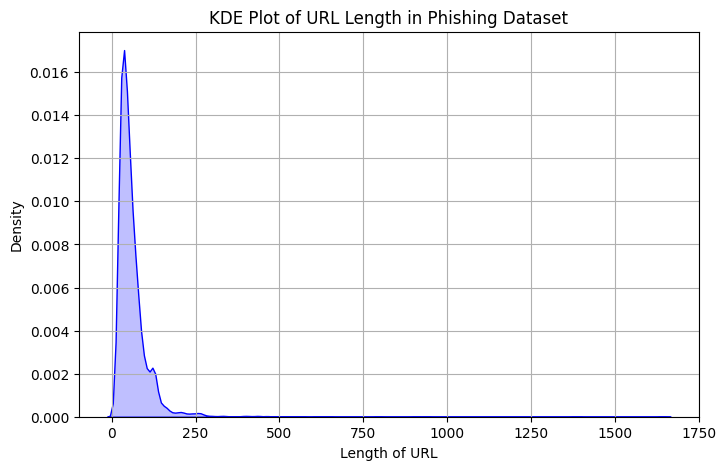

In [ ]:
# Plot KDE for a selected numeric column (Example: 'length_url')
plt.figure(figsize=(8, 5))
sns.kdeplot(numeric_data['length_url'], fill=True, color='blue')

plt.title("KDE Plot of URL Length in Phishing Dataset")
plt.xlabel("Length of URL")
plt.ylabel("Density")
plt.grid(True)

plt.show()

/tmp/ipykernel_48007/3058750389.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="status", y="length_url", data=df, palette="muted")


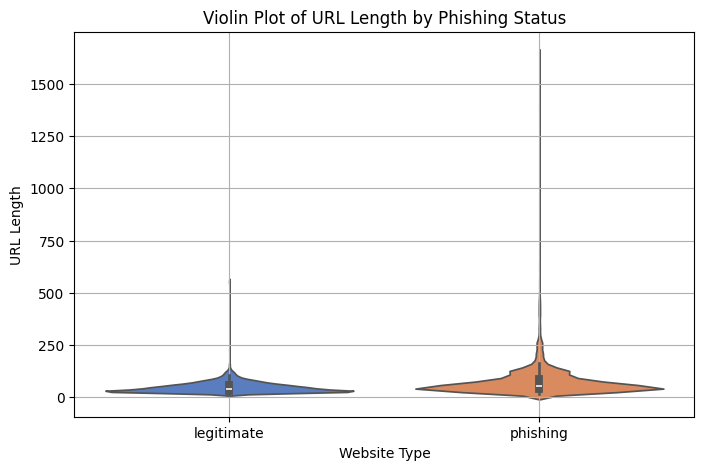

In [ ]:
# Select relevant columns (URL length and phishing status)
df = phishing_data[['length_url', 'status']]

# Create the violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x="status", y="length_url", data=df, palette="muted")

# Formatting
plt.title("Violin Plot of URL Length by Phishing Status")
plt.xlabel("Website Type")
plt.ylabel("URL Length")
plt.grid(True)

plt.show()

/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 95.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


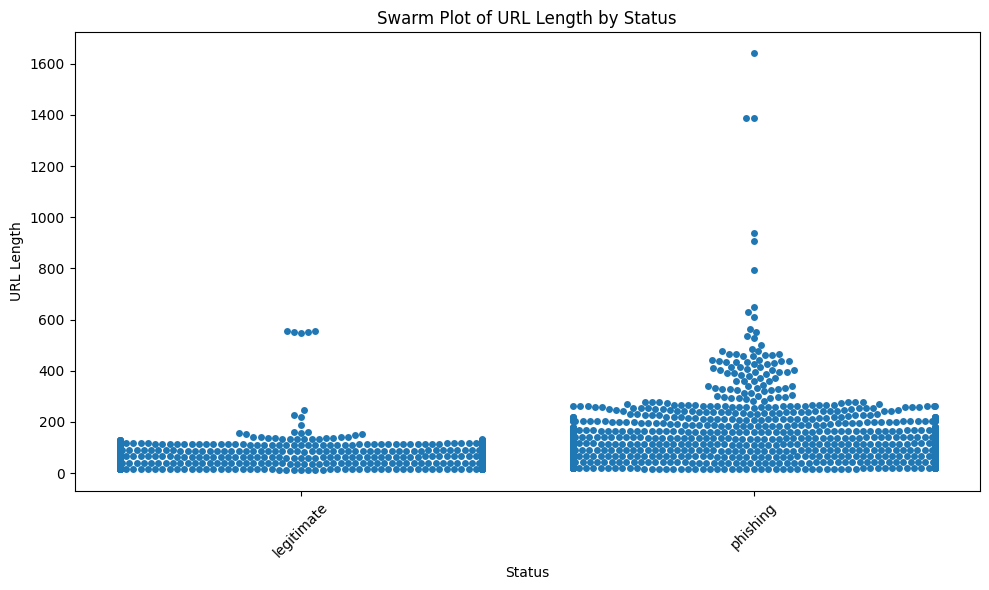

In [ ]:
# Swarm plot for a selected feature
plt.figure(figsize=(10, 6))
sns.swarmplot(x='status', y='length_url', data=phishing_data)
plt.title('Swarm Plot of URL Length by Status')
plt.xlabel('Status')
plt.ylabel('URL Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


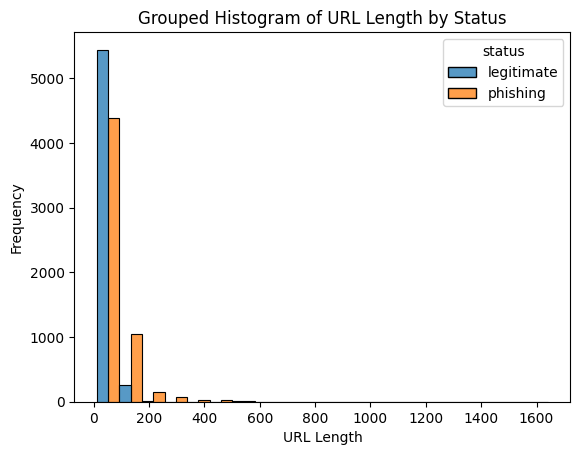

In [ ]:
# Plot a grouped histogram
sns.histplot(data=phishing_data, x='length_url', hue='status', multiple='dodge', bins=20)

# Add labels and title
plt.title('Grouped Histogram of URL Length by Status')
plt.xlabel('URL Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()

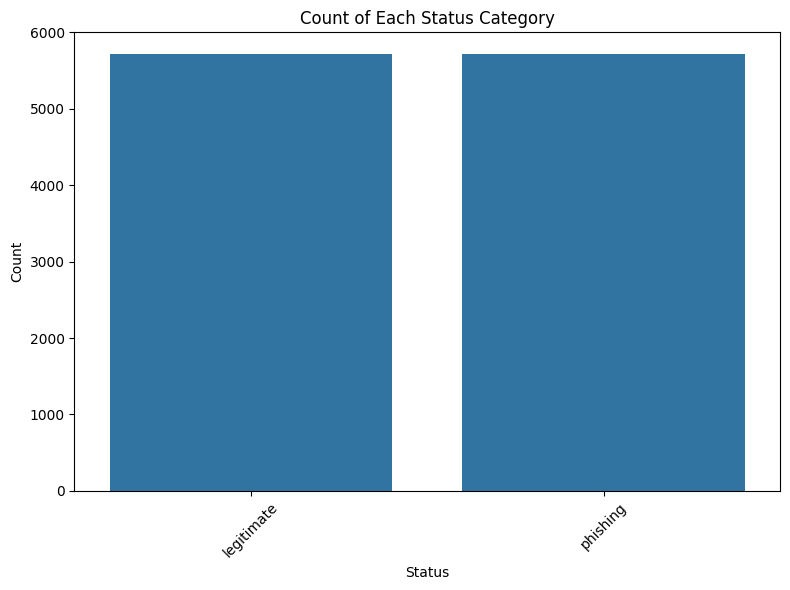

In [ ]:
# Bar plot to indicate total counts of each categorical variable in the 'status' column
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=phishing_data)
plt.title('Count of Each Status Category')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculating means, medians, and modes for numeric columns
mean_values = numeric_data.mean()
median_values = numeric_data.median()
mode_values = numeric_data.mode().iloc[0]  # Taking the first mode in case there are multiple

summary_table = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

# Display the table
print(summary_table)


                          Mean  Median  Mode
length_url           61.126684    47.0  26.0
length_hostname      21.090289    19.0  16.0
ip                    0.150569     0.0   0.0
nb_dots               2.480752     2.0   2.0
nb_hyphens            0.997550     0.0   0.0
...                        ...     ...   ...
domain_age         4062.543745  3993.0  -1.0
web_traffic      856756.643307  1651.0   0.0
dns_record            0.020122     0.0   0.0
google_index          0.533946     1.0   1.0
page_rank             3.185739     3.0   0.0

[87 rows x 3 columns]


Conclusion:

Overview of the phishing dataset-

The dataset contains 11,430 rows and 89 columns with no missing values or duplicates.

The columns include numerical and categorical values related to URLs and website characteristics, which are useful for detecting phishing attempts.

The dataset looks complete and contains detailed features related to website attributes, which seem relevant for analysis.

Since no missing values or duplicate rows were found, the dataset seems well-structured and ready for analysis.

The dataset includes a mix of numeric and categorical features, which means we can apply statistical analysis, machine learning models, or visualization techniques.

The overall shape of the distribution:

The overall shape of the distribution exhibits multiple characteristics. Some features display a right-skewed distribution, while others exhibit a bimodal shape. There are also cases where the distribution doesn't follow a clear pattern, appearing more uniform or lacking a distinct shape.

Outliers:

Yes, many columns contain outliers. Some notable columns with outliers include ip, nb_at, nb_qm, nb_www, https_token, tld_in_path, tld_in_subdomain, abnormal_subdomain.
These outliers could skew the data, and it may be worth investigating or handling them during preprocessing.

Multiple related histograms:

When comparing multiple histograms, the distribution often appears right-skewed, with different colors aiding in the clarity of comparison. The use of color coding makes it easier to distinguish between different groups and understand how the distribution shifts across them.

The minimum and maximum values represented in each histogram:

In most histograms, the minimum value is 0 and the maximum value is 1. This suggests that many columns may be binary or contain categorical data represented by these two values. Some features may also have different ranges, but 0 and 1 are the most common values.

Bin sizes affect the histogram:

The choice of bin size plays a significant role in how histograms are visualized such as large bin width (Few Bins) results in a coarser histogram, which might obscure important details.
It can mask multimodal distributions and make it harder to observe subtle trends.
Small Bin Width (Many Bins) creates a finer histogram, revealing more detailed information.
However, it can appear noisy, displaying random fluctuations instead of meaningful patterns. This can make it challenging to differentiate between real trends and random noise.
Changing the bin sizes can help uncover patterns like skewness or outliers that might not be initially visible.

The distribution does not appear normal. The histograms reveal right-skewness, sparse data, and asymmetry, suggesting the data is not normally distributed.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

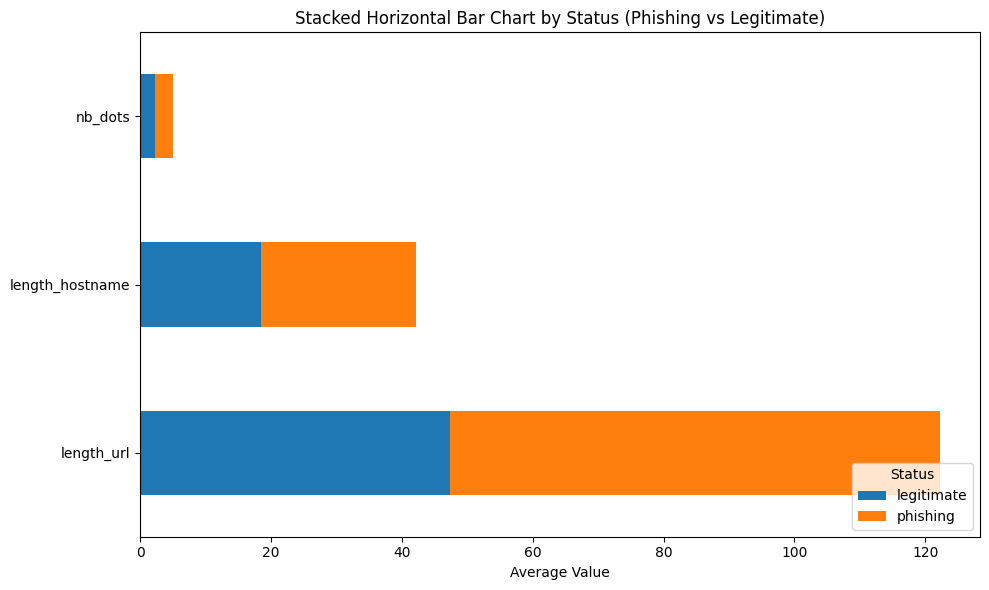

In [ ]:
# Select numeric columns to visualize
numeric_columns = ['length_url', 'length_hostname', 'nb_dots']

# Calculate the mean values grouped by 'status' (phishing vs legitimate)
grouped_data = phishing_data.groupby('status')[numeric_columns].mean().T

# Draw a stacked horizontal bar chart
grouped_data.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.xlabel('Average Value')
plt.title('Stacked Horizontal Bar Chart by Status (Phishing vs Legitimate)')
plt.legend(title='Status', loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

This stacked horizontal bar chart compares three features (length of URL, length of hostname, and number of dots in the URL) for phishing and legitimate websites.

Blue bars represent legitimate websites.
Orange bars represent phishing websites.
Longer bars indicate higher average values for a feature.

Key Observations:
Phishing URLs tend to be longer than legitimate ones.
Hostname length is similar for both, but phishing URLs are slightly longer on average.
The number of dots in the URL is small in both cases, but phishing URLs have slightly more.